In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
y_val = np.load("/home/notchla/Documents/mias_y_val.npy", allow_pickle=True)
x_val = np.load("/home/notchla/Documents/mias_xval_poisson_gauss01.npy", allow_pickle=True)
recon_perc = np.load("/home/notchla/Documents/mias_recon_poisson_gauss01.npy", allow_pickle = True)
recon_edge = np.load("/home/notchla/Documents/edge_mias_recon_poisson_gauss01.npy", allow_pickle = True)


In [3]:
x_val = tf.cast(x_val, "float32")
y_val = tf.cast(y_val, "float32")
recon_perc = tf.cast(recon_perc, "float32")
recon_edge = tf.cast(recon_edge, "float32")

In [4]:
ssim_noise = tf.image.ssim(y_val, x_val, max_val = 1.0)
ssim_perc = tf.image.ssim(y_val, recon_perc, max_val = 1.0)
ssim_edge = tf.image.ssim(y_val, recon_edge, max_val = 1.0)

print(tf.reduce_mean(ssim_noise), tf.reduce_mean(ssim_perc), tf.reduce_mean(ssim_edge))


tf.Tensor(0.086650476, shape=(), dtype=float32) tf.Tensor(0.9254835, shape=(), dtype=float32) tf.Tensor(0.91295534, shape=(), dtype=float32)


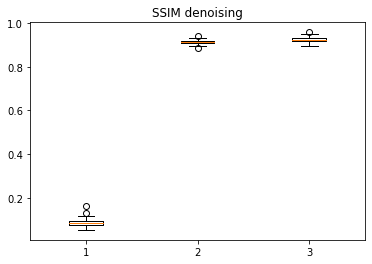

In [14]:
fig, ax = plt.subplots()
ax.set_title("SSIM denoising")
plt.boxplot([ssim_noise, ssim_edge, ssim_perc])
plt.savefig("/home/notchla/Documents/boxplot", dpi = 300, bbox_inches="tight")